In [7]:
from pxr import Usd,Ar

```
#usda 1.0
(
    defaultPrim = "sample"
)

def "sample"
{
    asset imgPath = @./Houdini_black_color.png@
    # このファイルに↑用の変換パラメーターなどを一緒に保存しておく
}
```
usda はこんな感じ。  
設定ファイルに画像ファイルを使いたい場合などに、使用したい画像のパスを書いておく。  
それで、 usdzip を使用して usda と 画像ファイルを1ファイルにしておく。  
  
texUsdzip/Houdini_balck_color.png  
__________/texUsdzip.usda  

In [3]:
# 画像+パラメーターが入っているusdaを usdzにしたものを用意。
stage = Usd.Stage.Open("sample.usdz")
prim = stage.GetDefaultPrim()

In [53]:
# imgPath アトリビュートには、パラメーターとワンセットで使いたい画像ファイルのパスを assetとして保持
assetPath = prim.GetAttribute("imgPath").Get()
# assetPathは resolvedPath すると、usdz内のどこにあるかを取得できる。
print(assetPath.resolvedPath)

d:\work\notebooks\USD\UsdZip\sample.usdz[work/HoudiniWork/CreateParamSample/usd/texUsdzip/Houdini_black_color.png]


In [43]:
# UsdZipFile で usdz を開いて、その中から画像ファイルをGetFile を使用して bitearray で画像情報を取得。
usdzip =Usd.ZipFile.Open("sample.usdz")

path = assetPath.resolvedPath.split("[")[-1][:-1]
img = usdzip.GetFile(path)

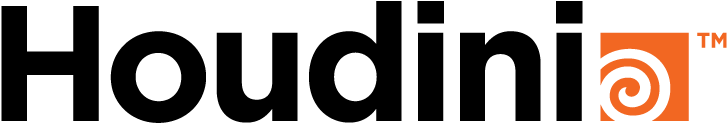

In [51]:
from PIL import Image, ImageOps
import io

# 画像を表示
i = Image.open(io.BytesIO(img))
i
